# Linear Regression

In [1]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sklearn 제공되는 boston data set
from sklearn.datasets import load_wine

In [3]:
# 데이터셋 불러오기
wine = load_wine()

In [4]:
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [5]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [7]:
print(wine.feature_names)
print(wine.target)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
# x data, y data 배분
X = wine.data
y = wine.target

In [9]:
np.min(X,axis = 0)

array([1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01, 9.800e-01,
       3.400e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01, 1.270e+00,
       2.780e+02])

In [10]:
np.max(X, axis = 0)

array([1.483e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
       5.080e+00, 6.600e-01, 3.580e+00, 1.300e+01, 1.710e+00, 4.000e+00,
       1.680e+03])

In [11]:
# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
mms = MinMaxScaler()
mms.fit(X)
X_scaled = mms.transform(X)

In [13]:
np.min(X_scaled, axis = 0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.max(X_scaled, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=2021)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=2021)

In [18]:
X_train.shape, X_val.shape, X_test.shape

((113, 13), (29, 13), (36, 13))

In [19]:
# 모델 코딩
# 사용 모델: Linear Regression

In [20]:
# 1. model import
from sklearn.linear_model import LinearRegression

In [21]:
# 2. model 선언하기
lr = LinearRegression()

In [22]:
# 3. fit() 학습하기
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
# 4. predict() 예측하기
lr.predict(X_val)

array([ 0.42187976,  2.06964898,  0.19731981,  0.94294599,  1.59912417,
        0.66396502,  0.32755298,  0.49099074,  0.06494841,  0.38280634,
        1.72563833, -0.07783182,  1.28182506,  1.61313151,  0.14837453,
       -0.34098717,  1.43980959,  2.20342524,  1.64209627,  1.18403649,
        0.91266475,  2.18640353, -0.26352245,  0.31771219,  2.17609758,
        0.22599696,  0.73050183,  0.66599208,  2.00304667])

In [24]:
# 성능 테스트 평가
from sklearn.metrics import mean_squared_error as mse ## regression**
from sklearn.metrics import accuracy_score ## classification

In [25]:
y_val_pred = lr.predict(X_val)

In [26]:
print('mse:   ',mse(y_val,y_val_pred))

mse:    0.12005586460541191


In [27]:
print('rmse:   ',mse(y_val,y_val_pred)**(0.5))

rmse:    0.3464907857438808


In [28]:
y_val.max(),y_val.min()

(2, 0)

In [29]:
# coef/weight 확인 
lr.coef_

array([-0.26703313,  0.09439894, -0.2337702 ,  0.52605058, -0.29435167,
        0.36835528, -1.91715196, -0.28682321, -0.05774351,  0.82777046,
       -0.28423385, -0.75742377, -1.13417076])

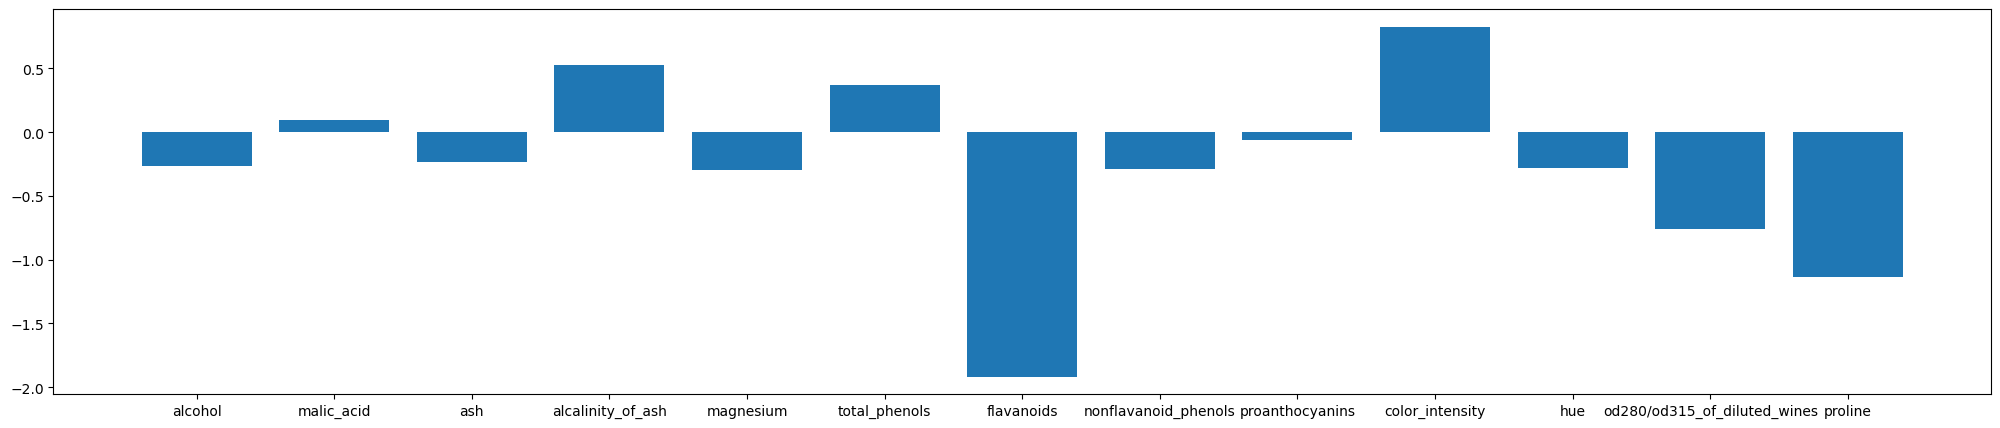

In [30]:
plt.figure(figsize=(25,5))
plt.bar(wine.feature_names,lr.coef_)
plt.show()

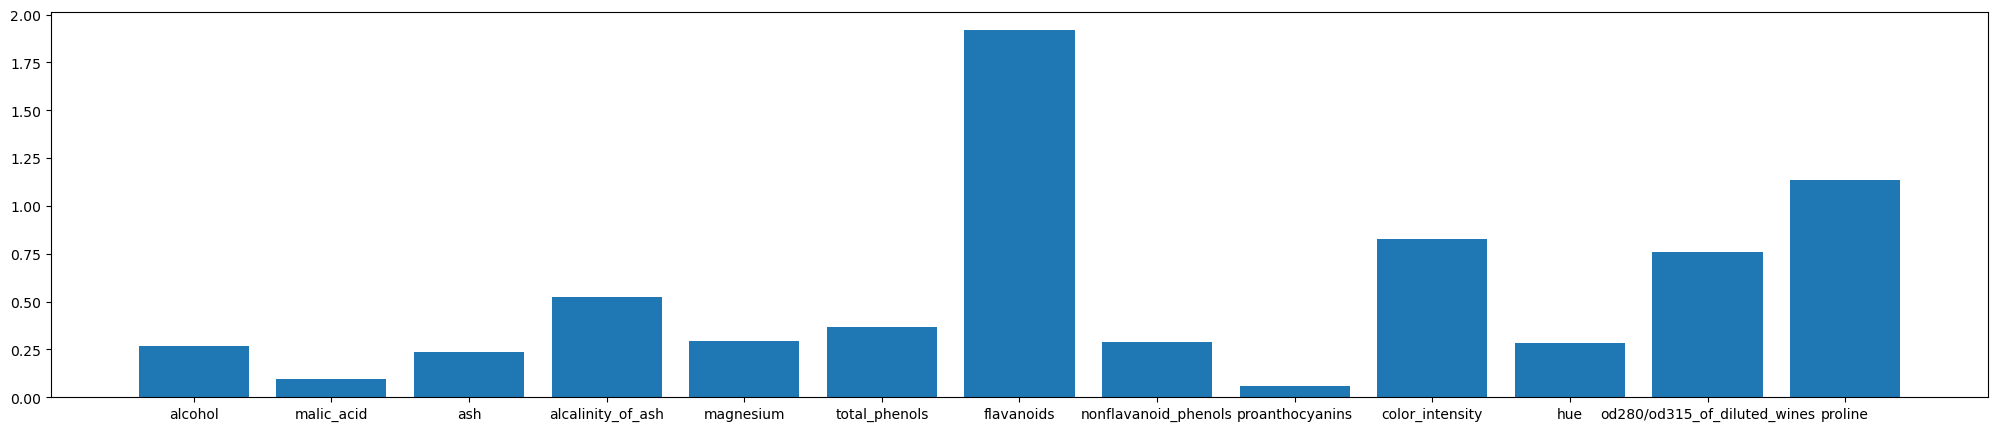

In [31]:
plt.figure(figsize=(25,5))
plt.bar(wine.feature_names,abs(lr.coef_))
plt.show()

In [32]:
# bias 확인
lr.intercept_

2.302765656998744

- coef_ : 기울기
- intercept_ : 절편
- '_' : 머신러닝에서 유도한 결과를 나타내는 기호

# LogisticRegression

In [33]:
# x data, y data 배분
X = wine.data
y = wine.target

In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [35]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [36]:
y.shape

(178,)

In [37]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
X.shape

(178, 13)

In [39]:
# scaling
from sklearn.preprocessing import StandardScaler

In [40]:
sts = StandardScaler()

In [41]:
sts.fit(X)

StandardScaler()

In [42]:
X_scaled = sts.transform(X)

In [43]:
np.max(X_scaled, axis = 0)

array([2.25977152, 3.10919247, 3.15632527, 3.15451071, 4.37137214,
       2.53951547, 3.06283174, 2.40240319, 3.48507251, 3.43543192,
       3.30169422, 1.96091499, 2.97147258])

In [44]:
np.min(X, axis = 0)

array([1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01, 9.800e-01,
       3.400e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01, 1.270e+00,
       2.780e+02])

In [45]:
# train test set 분리과정
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2021)

In [47]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [48]:
# 1.  모델 임포트 
# 클래스가 3개로 나눠져 있기 때문에 Linear가 아닌 Logistic으로 사용
from sklearn.linear_model import LogisticRegression

In [49]:
# 2. 모델 선언
logistic_model = LogisticRegression()

In [50]:
# 3. fit() 학습
logistic_model.fit(X_train,y_train)

C:\Users\82103\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# 4. predict() 예측
logistic_model.predict(X_test)

array([0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [52]:
# 5. 성능 평가
# Accuracy
from sklearn.metrics import accuracy_score

In [53]:
y_pred =  logistic_model.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.9722222222222222

In [55]:
# accuracy만 확인 하지말고 recall, preecision
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



# Decision_tree model

In [57]:
# 데이터: wine data
# 1. 모델 임포트
from sklearn.tree import DecisionTreeClassifier

In [58]:
# 2. 모델 선언
dtc = DecisionTreeClassifier()

In [59]:
# 3. fit 학습
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# 4. predict 예측
y_pred = dtc.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         5

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



**LogisticRegression 보다 복잡한 알고리즘임에도 불구하고 성능이 떨어지는 이유**
- 학습데이터가 적음 (142,13)
- 오버피팅 가능성 있음

In [65]:
from sklearn.tree import plot_tree

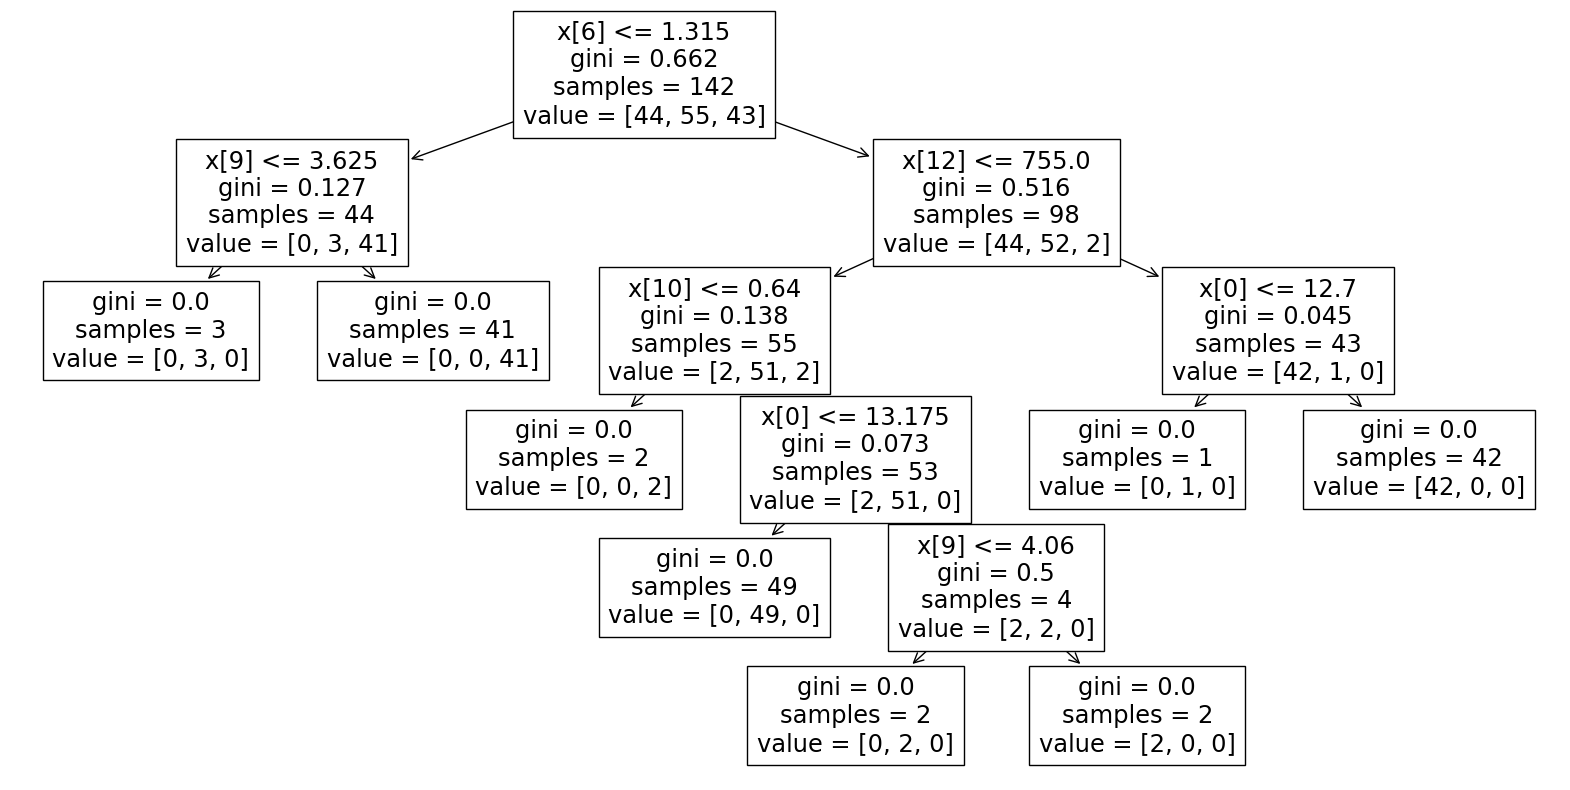

In [66]:
plt.figure(figsize=(20,10))
plot_tree(dtc)
plt.show()

In [67]:
# max_depth 튜닝
tree_no = []
dtc_accuacy =[]

for i in range(1,10):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    acc= dtc.score(X_test, y_test)
    tree_no.append(i)
    dtc_accuacy.append(acc)

In [68]:
dtc_accuacy

[0.4166666666666667,
 0.9166666666666666,
 0.9444444444444444,
 0.9166666666666666,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9166666666666666,
 0.9444444444444444]

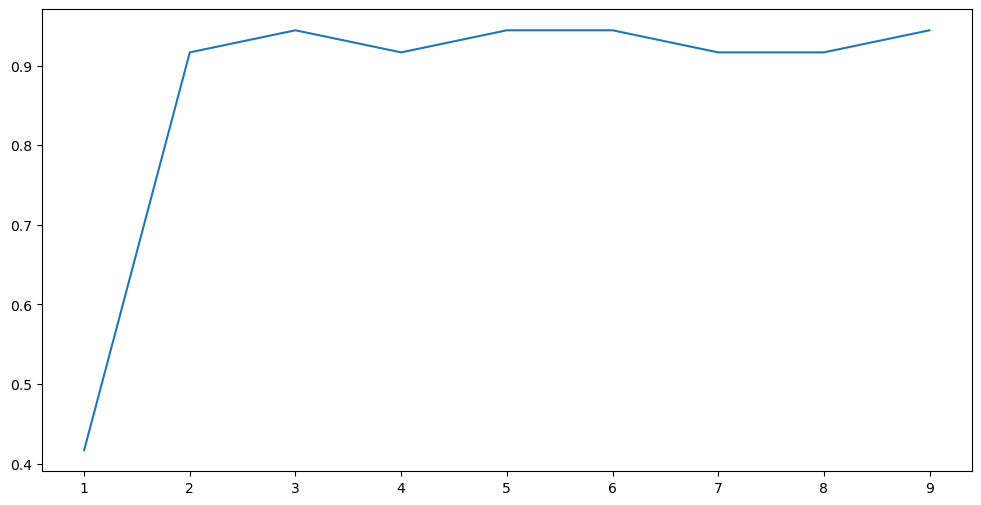

In [69]:
plt.figure(figsize = (12,6))
plt.plot(tree_no,dtc_accuacy)
plt.show()

# Random forest model

In [70]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [71]:
# 1. 모델 임포트
from sklearn.ensemble import RandomForestClassifier

In [72]:
# 2. 모델 선언
rfc = RandomForestClassifier()

In [73]:
# 3. fit 학습
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
# 4. predict 예측
y_pred = rfc.predict(X_test)

In [75]:
# 5. 성능평가
accuracy_score(y_test,y_pred)

0.9722222222222222

In [76]:
rfc.score(X_test,y_test)

0.9722222222222222

In [77]:
rfc.score(X_train,y_train)

1.0

In [84]:
# 파라미터 조절_1
estimators = []
accuracy = []

for i in range(1,10):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    acc = rfc.score(X_test,y_test)
    estimators.append(i)
    accuracy.append(acc)

In [85]:
accuracy

[0.8888888888888888,
 0.7777777777777778,
 0.8333333333333334,
 0.9722222222222222,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9722222222222222,
 0.9444444444444444]

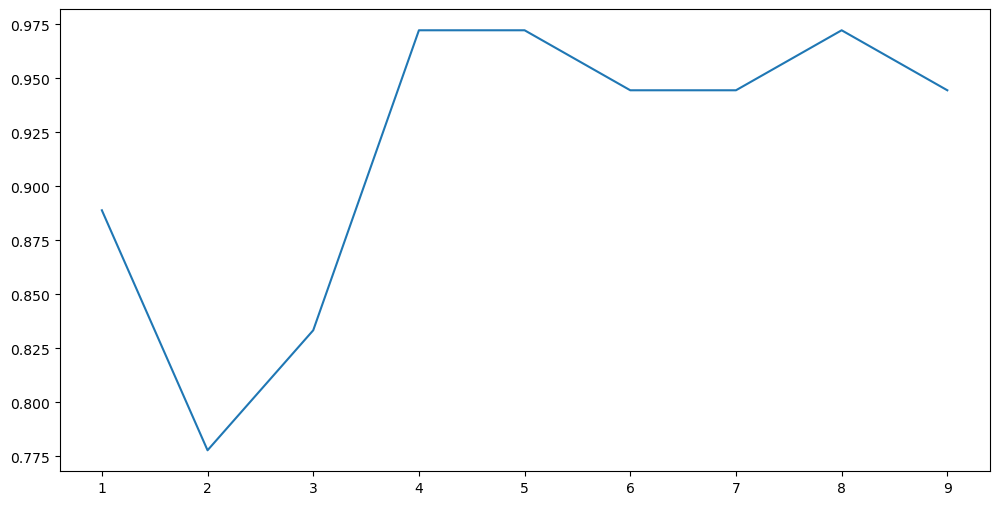

In [86]:
plt.figure(figsize = (12,6))
plt.plot(estimators, accuracy)
plt.show()

# 학습 부족

In [87]:
# 파라미터 조절_2
estimators = []
accuracy = []

for i in range(1,100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    acc = rfc.score(X_test,y_test)
    estimators.append(i)
    accuracy.append(acc)

In [88]:
accuracy

[0.9444444444444444,
 0.9166666666666666,
 1.0,
 0.8611111111111112,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 1.0,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222,
 1.0,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222222,
 0.9722222222222

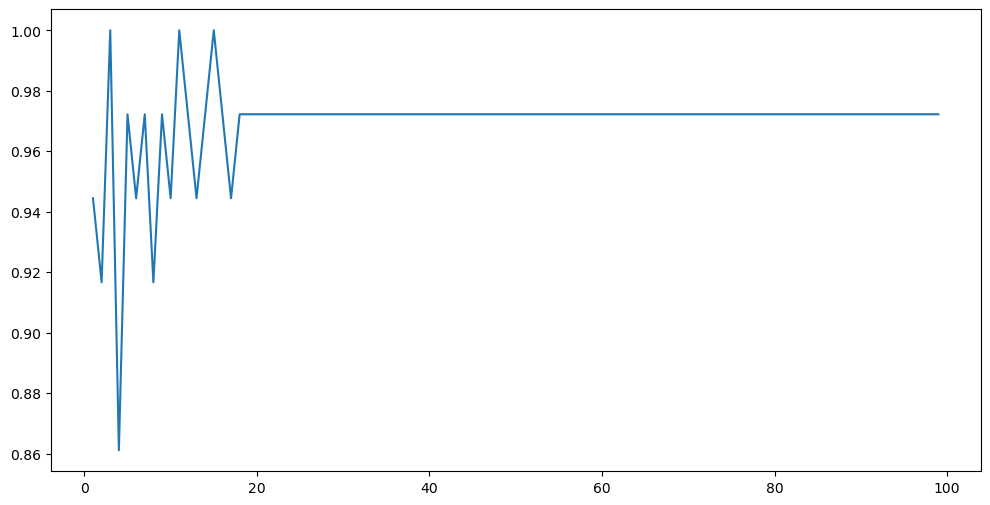

In [89]:
plt.figure(figsize = (12,6))
plt.plot(estimators, accuracy)
plt.show()